1. Perform pre-processing on the full dataset here: https://www.kaggle.com/sohier/calcofi 

In [ ]:
# main libraries
import pandas as pd
import numpy as np
import time
# visual libraries
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')
# sklearn libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
#from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
bottle_df = pd.read_csv("Assignment_data/bottle.csv")
bottle_df.head(2)

In [ ]:
bottle_df.isnull().sum()

In [330]:
bottle_df['STheta'].mean()

25.819393737363907

In [ ]:
bottle_df["T_degC"].dropna()

In [359]:
bottle_df["T_degC"].isnull().sum()

10963

In [ ]:
#simpleimputer  - process of substituting missing values from the dataset using sklearn simpleimputer. 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(bottle_df[["T_degC"]])
bottle_df["T_degC"] = imputer.transform(bottle_df[["T_degC"]])
bottle_df["T_degC"]

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(bottle_df[["Salnty"]])
bottle_df["Salnty"] = imputer.transform(bottle_df[["Salnty"]])
bottle_df["Salnty"]

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(bottle_df[["STheta"]])
bottle_df["STheta"] = imputer.transform(bottle_df[["STheta"]])
bottle_df["STheta"]

In [ ]:
#drops "TA1" column
bottle_df.drop("TA1", axis=1)
bottle_df.drop("Cst_Cnt", axis=1)

In [ ]:
revised_bottle_df = pd.DataFrame(bottle_df[["T_degC", "Salnty", "STheta"]])
revised_bottle_df

In [364]:
#Standardization
#transforming the values in the columns to mean as 0 and standard deviation of 1. 
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = std.fit_transform(revised_bottle_df[["T_degC", "Salnty", "STheta"]])

In [ ]:
cast_df = pd.read_csv("Assignment_data/cast.csv")
cast_df.tail()

In [ ]:
cast_df.columns

In [367]:
#checking for missing values
cast_df.isnull().any().sum()

29

In [368]:
cast_df["Sta_Code"].values

array(['NST', 'NST', 'NST', ..., 'ST', 'ST', 'ST'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cast_df["Sta_Code"] = label_encoder.fit_transform(cast_df["Sta_Code"].values)
cast_df

In [ ]:
#converting nominal categorical variables using one Hot encoding. 
cast_df = pd.get_dummies(cast_df[["Sta_Code"]])
cast_df

2. Perform feature selection (decide what columns should be included in your analysis). How did you figure out what features were important?

Recursive future elimination - removes attributes and builds a model on the remaining attributes. It ranks the features as per accuracy metrics. 


/Users/trimpu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


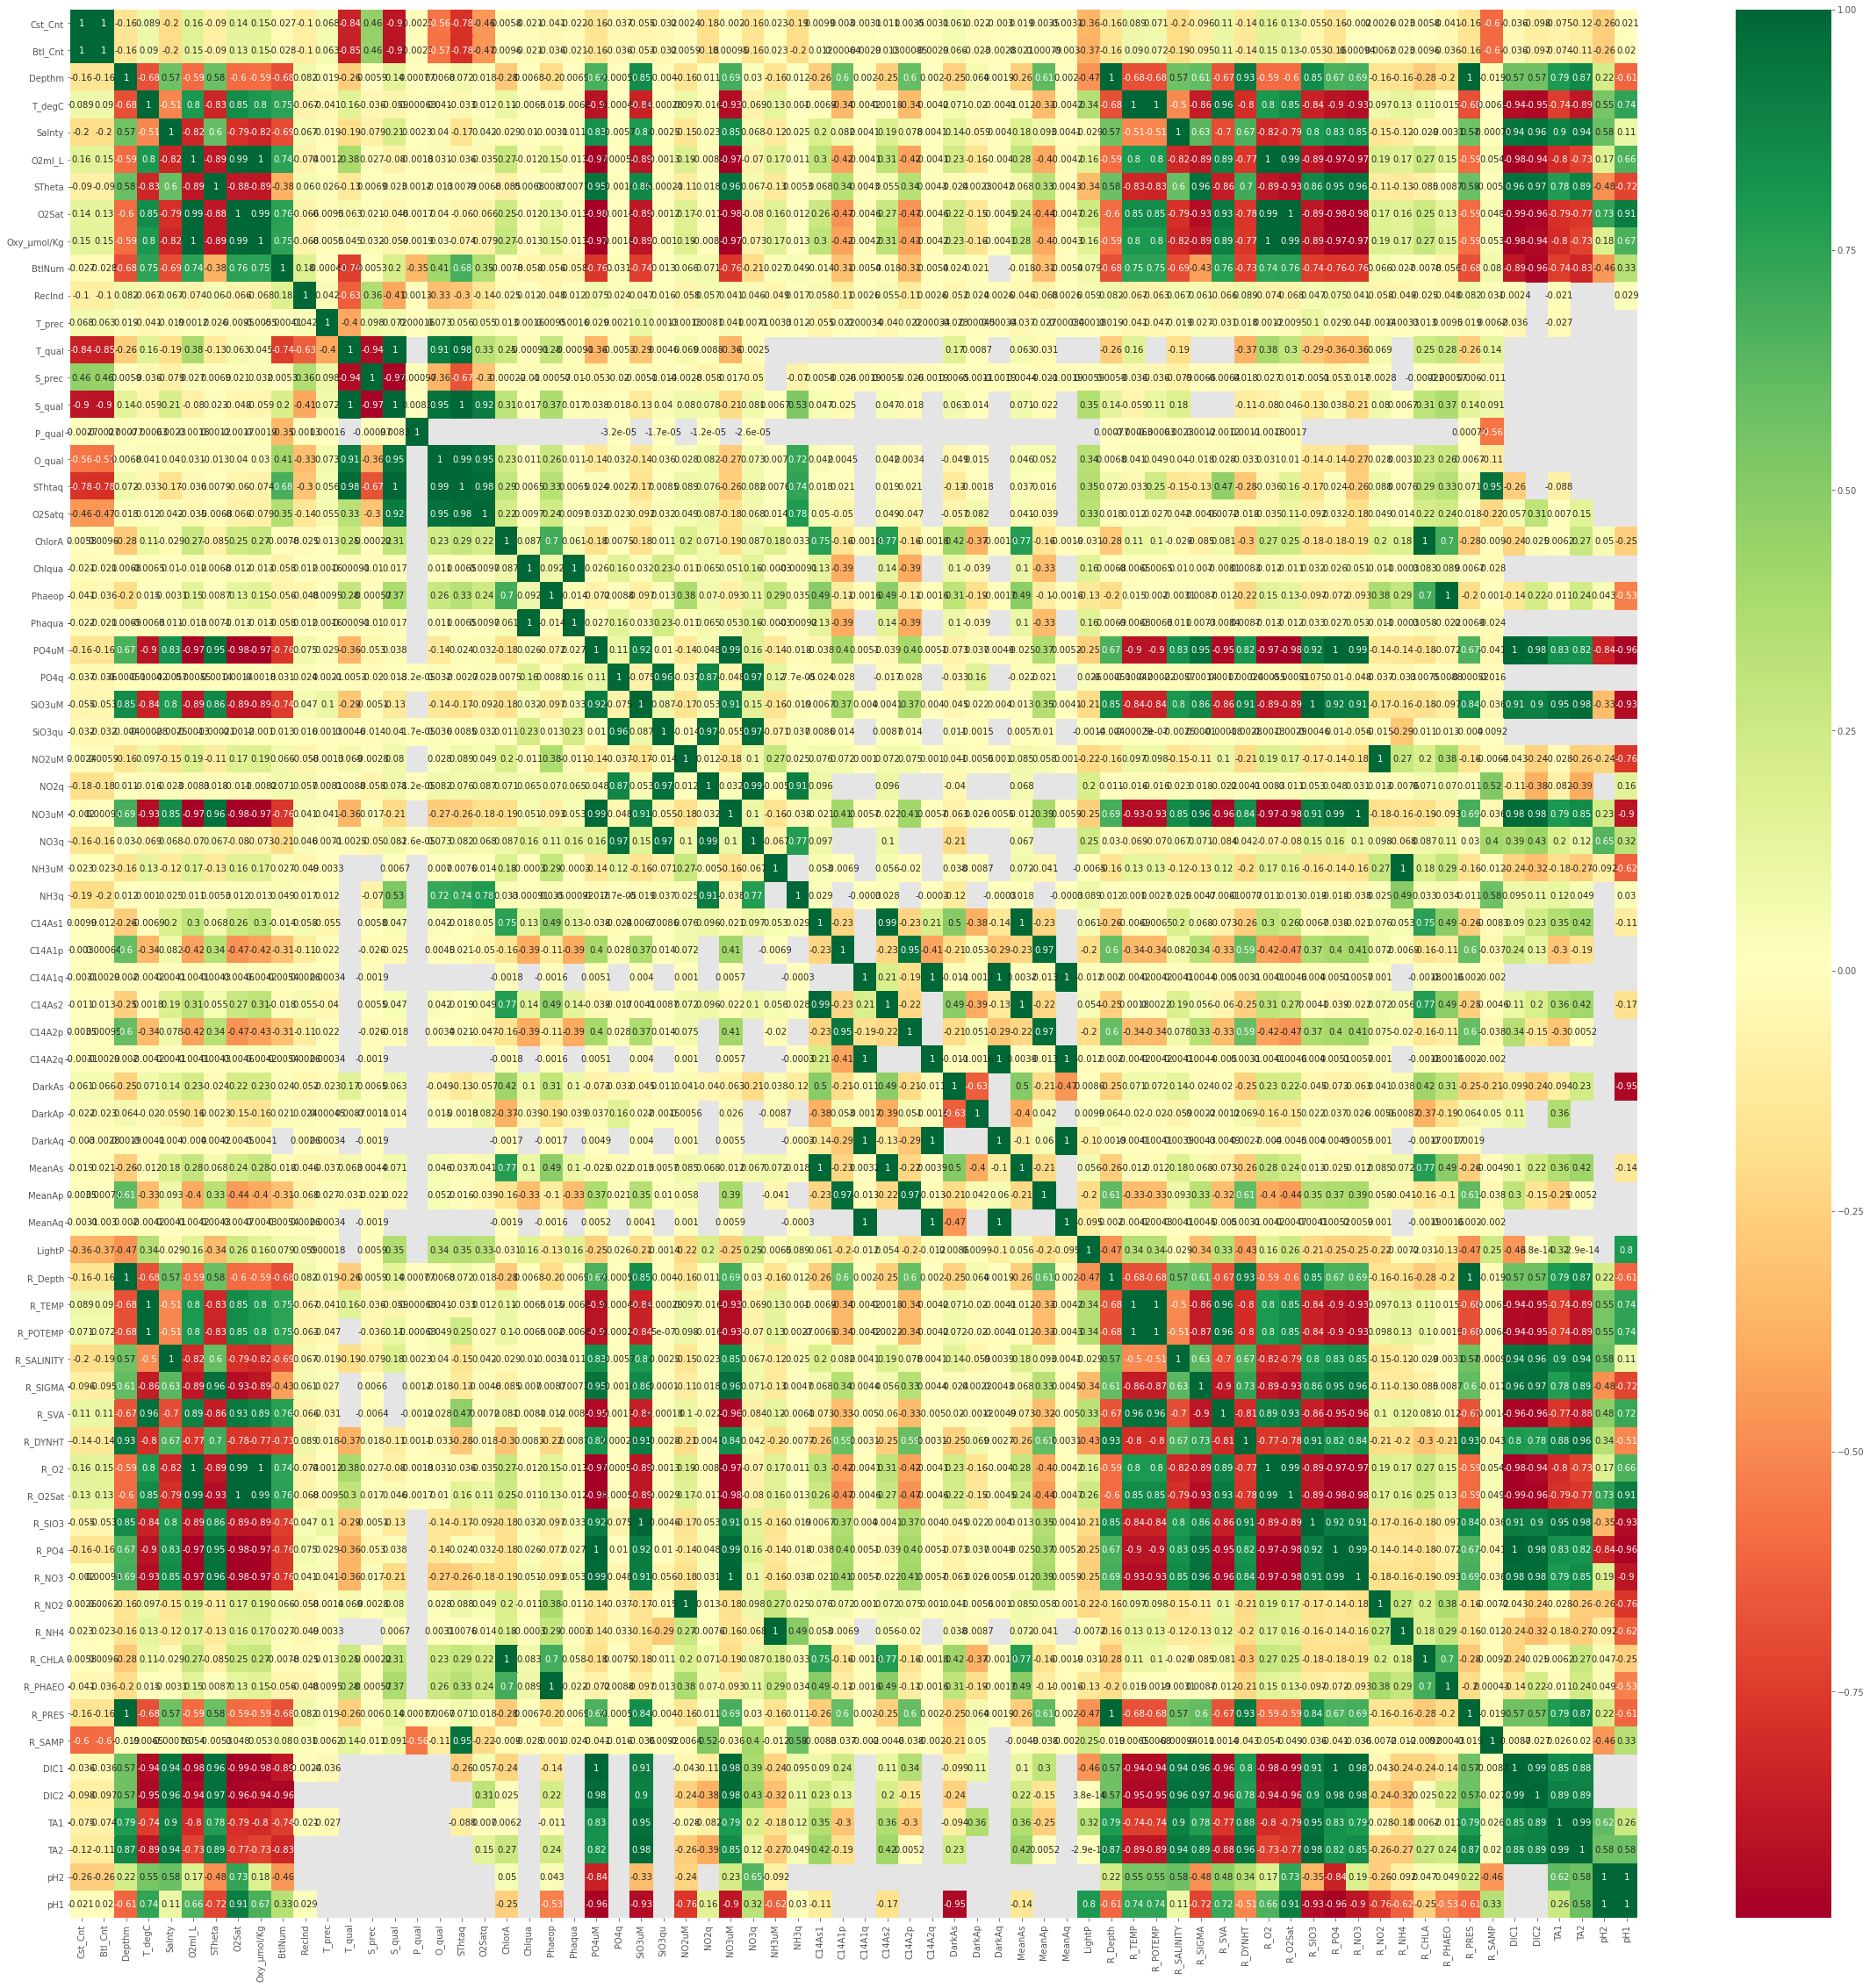

In [371]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv("Assignment_data/bottle.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,5]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True, cmap="RdYlGn")

In [377]:
bottle_df.columns
bottle_df.drop(['Cst_Cnt', 'Sta_ID', 'Depth_ID'], axis=1, inplace=True)

In [378]:
#bottle_df.drop("Cst_Cnt", axis=1, inplace=True)

In [408]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
r_bottle_df = bottle_df.select_dtypes(include=numerics)
r_bottle_df.isnull().sum()

Btl_Cnt    0
Depthm     0
T_degC     0
Salnty     0
O2ml_L     0
          ..
DIC2       0
TA1        0
TA2        0
pH2        0
pH1        0
Length: 69, dtype: int64

In [410]:
r_bottle_df.fillna(r_bottle_df.mean())

,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
0,1,0,10.500,33.4400,3.392468,25.64900,57.103779,148.808694,10.497426,3,...,0.450225,0.198599,0,162.071521,2153.239714,2168.14833,2256.055845,2278.858803,7.94857,7.910983
1,2,8,10.460,33.4400,3.392468,25.65600,57.103779,148.808694,10.497426,3,...,0.450225,0.198599,8,162.071521,2153.239714,2168.14833,2256.055845,2278.858803,7.94857,7.910983
2,3,10,10.460,33.4370,3.392468,25.65400,57.103779,148.808694,10.497426,7,...,0.450225,0.198599,10,162.071521,2153.239714,2168.14833,2256.055845,2278.858803,7.94857,7.910983
3,4,19,10.450,33.4200,3.392468,25.64300,57.103779,148.808694,10.497426,3,...,0.450225,0.198599,19,162.071521,2153.239714,2168.14833,2256.055845,2278.858803,7.94857,7.910983
4,5,20,10.450,33.4210,3.392468,25.64300,57.103779,148.808694,10.497426,7,...,0.450225,0.198599,20,162.071521,2153.239714,2168.14833,2256.055845,2278.858803,7.94857,7.910983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,864859,0,18.744,33.4083,5.805000,23.87055,108.740000,253.470000,10.497426,7,...,0.910000,0.180000,0,162.071521,2153.239714,2168.14833,2256.055845,2278.858803,7.94857,7.910983
864859,864860,2,18.744,33.4083,5.805000,23.87072,108.740000,253.470000,4.000000,3,...,0.910000,0.180000,2,4.000000,2153.239714,2168.14833,2256.055845,2278.858803,7.94857,7.910983
864860,864861,5,18.692,33.4150,5.796000,23.88911,108.460000,253.060000,3.000000,3,...,0.920000,0.180000,5,3.000000,2153.239714,2168.14833,2256.055845,2278.858803,7.94857,7.910983
864861,864862,10,18.161,33.4062,5.816000,24.01426,107.740000,253.920000,2.000000,3,...,1.080000,0.310000,10,2.000000,2153.239714,2168.14833,2256.055845,2278.858803,7.94857,7.910983


In [383]:
#bottle_df.drop('Sta_ID', axis=1, inplace=True)
#bottle_df.drop('Depth_ID', axis=1, inplace=True)
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
r_bottle_df = bottle_df.select_dtypes(include=numerics)
r_bottle_df.columns

Index(['Btl_Cnt', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta', 'O2Sat',
       'Oxy_µmol/Kg', 'BtlNum', 'RecInd', 'T_prec', 'T_qual', 'S_prec',
       'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua',
       'Phaeop', 'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM',
       'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q', 'C14As1', 'C14A1p', 'C14A1q',
       'C14As2', 'C14A2p', 'C14A2q', 'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs',
       'MeanAp', 'MeanAq', 'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat',
       'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO',
       'R_PRES', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1'],
      dtype='object')

In [216]:
#bottle_df.dropna()
bottle_df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Depthm', 'T_degC', 'Salnty', 'O2ml_L', 'STheta',
       'O2Sat', 'Oxy_µmol/Kg', 'BtlNum', 'RecInd', 'T_prec', 'T_qual',
       'S_prec', 'S_qual', 'P_qual', 'O_qual', 'SThtaq', 'O2Satq', 'ChlorA',
       'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM', 'PO4q', 'SiO3uM', 'SiO3qu',
       'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM', 'NH3q', 'C14As1', 'C14A1p',
       'C14A1q', 'C14As2', 'C14A2p', 'C14A2q', 'DarkAs', 'DarkAp', 'DarkAq',
       'MeanAs', 'MeanAp', 'MeanAq', 'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat',
       'R_SIO3', 'R_PO4', 'R_NO3', 'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO',
       'R_PRES', 'R_SAMP', 'DIC1', 'DIC2', 'TA1', 'TA2', 'pH2', 'pH1'],
      dtype='object')

In [ ]:
X = bottle_df.drop('T_degC', axis=1)
y = bottle_df['T_degC']

model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

cols = list(X.columns)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

3. Perform multiple linear regression on the dataset. Be sure to display the final resulting equation with the coefficients and intercept in markdown. 

In [61]:
revised_bottle_df = pd.DataFrame(bottle_df[["T_degC", "Salnty", "STheta"]])
revised_bottle_df

,T_degC,Salnty,STheta
0,10.500,33.4400,25.64900
1,10.460,33.4400,25.65600
2,10.460,33.4370,25.65400
3,10.450,33.4200,25.64300
4,10.450,33.4210,25.64300
...,...,...,...
864858,18.744,33.4083,23.87055
864859,18.744,33.4083,23.87072
864860,18.692,33.4150,23.88911
864861,18.161,33.4062,24.01426


In [81]:
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as sm
mdl_Tdegc_vs_both = sm.ols("T_degC ~ Salnty + STheta", data=revised_bottle_df).fit()
print(mdl_Tdegc_vs_both)

In [88]:
#prediction flow
from itertools import product
Salnty =np.arange(28, 38)
STheta = np.arange(20, 251)
p = product(Salnty, STheta)
explanatory_data = pd.DataFrame(p, columns=["Salnty", "STheta"])
print(explanatory_data)
                 
#revised_bottle_df["Salnty"].min() #28.431
#revised_bottle_df["Salnty"].max() #37.034

      Salnty  STheta
0         28      20
1         28      21
2         28      22
3         28      23
4         28      24
...      ...     ...
2305      37     246
2306      37     247
2307      37     248
2308      37     249
2309      37     250

[2310 rows x 2 columns]


In [87]:
#revised_bottle_df["STheta"].min() #20.934
#revised_bottle_df["STheta"].max() #250.784

In [89]:
prediction_data = explanatory_data.assign(T_degC= mdl_Tdegc_vs_both.predict(explanatory_data) )
print(prediction_data)

      Salnty  STheta      T_degC
0         28      20   28.535803
1         28      21   25.552027
2         28      22   22.568251
3         28      23   19.584475
4         28      24   16.600699
...      ...     ...         ...
2305      37     246 -646.296892
2306      37     247 -649.280668
2307      37     248 -652.264444
2308      37     249 -655.248220
2309      37     250 -658.231996

[2310 rows x 3 columns]


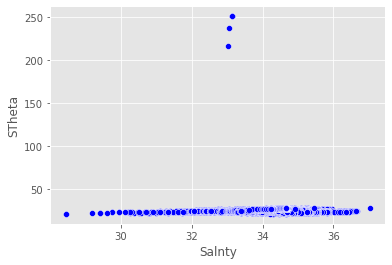

In [101]:
#Plotting the predictions
sns.scatterplot(x="Salnty", y="STheta", data=revised_bottle_df, ci=68, color='Blue')
plt.show()

In [ ]:
sns.scatterplot(x="Salnty", y="STheta", data=prediction_data)
plt.show()

In [103]:
#including an interaction
mdl_Tdegc_vs_both = sm.ols("T_degC ~ Salnty * STheta", data= revised_bottle_df).fit()
print(mdl_Tdegc_vs_both.summary() )

                            OLS Regression Results                            
Dep. Variable:                 T_degC   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                 1.616e+06
Date:                Mon, 07 Jun 2021   Prob (F-statistic):               0.00
Time:                        23:17:29   Log-Likelihood:            -1.5336e+06
No. Observations:              812174   AIC:                         3.067e+06
Df Residuals:                  812170   BIC:                         3.067e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2423.0478      2.573   -941.786

In [112]:
from sklearn import linear_model
X = explanatory_data[["STheta", "Salnty"]]
Y = prediction_data["T_degC"]

reg = linear_model.LinearRegression()
reg.fit(X, Y)
print("coefficients: \n", reg.coef_)
print('Intercept: \n', reg.intercept_)

coefficients: 
 [-2.98377603 -0.05547897]
Intercept: 
 89.76473480839115


4. Which regression approach had the “best” performance? Be sure to compare it to what you did last week.

In [114]:
#R squared - coeffiecient of determination - Larger the better
print(mdl_Tdegc_vs_both.rsquared)
print(mdl_Tdegc_vs_both.rsquared_adj)

0.8565260285626435
0.8565254985973476


In [115]:
#Residual standard error - typically size of the residues - smaller the best
rse_both = np.sqrt(mdl_Tdegc_vs_both.mse_resid)
rse_both

1.598833563615761

#root_mean_squared_error = 3.65 from last week linear regression results
#accuracy_score and r2 score 0.25
R2 is larger in case for multiple linear regression compared to single explanatory variable linear regression. Multi linear is best when compared to both. 

In [ ]:
#readings(output) from last weeks polynomial regression
Accuracy: 0.3083087002117306
R^2: 0.3083087002117306
Mean Squared Error: 12.333444219632465
Root Mean Squared Error: 3.5119003715413775

Compared to polynomial regression, multiple Linear regression has the best performance. This is because of low rmse and high coefficient of determination. 

5. Work with the diabetes dataset to perform multiple logistic regression. Look at the documentation for logistic regression in statsmodel and/or sklearn and see if you can tune the model performance based on available parameters. Please note: data scientists need to constantly learn new approaches to optimizing models. This is one way of doing that.

In [151]:
diabetes_df = pd.read_csv("../week_13/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [172]:
#Simplest logistic regression approach
logreg_approach = LogisticRegression(random_state=0).fit(X_train, y_train)
#sample_pred=[[6,148,72,35,0,33.6,0.627,50]]
y_predicted = logreg_approach.predict(X_test)

/Users/trimpu/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [173]:
logreg_approach.score(X,y)

0.7408854166666666

In [174]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.75      0.85      0.79       100
           1       0.62      0.46      0.53        54

    accuracy                           0.71       154
   macro avg       0.69      0.66      0.66       154
weighted avg       0.70      0.71      0.70       154



6. What are the other ways to assess the performance of the model besides accuracy? What approach makes the most sense with the diabetes dataset? Why?

In [119]:
#/week_13
diabetes_df = pd.read_csv("../week_13/diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [120]:
diabetes_df.isnull().sum()
#looks like data is already processed. 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [144]:
from statsmodels.formula.api import logit
#no interaction
mdl_Age_Glucose_no_inter = logit("Outcome ~ Age + Glucose", data=diabetes_df).fit()
print(mdl_Age_Glucose_no_inter.params)
#with interaction
mdl_Age_Glucose_inter = logit("Outcome ~ Age * Glucose", data=diabetes_df).fit()
print(mdl_Age_Glucose_inter.params)

Optimization terminated successfully.
         Current function value: 0.519116
         Iterations 6
Intercept   -5.912449
Age          0.024778
Glucose      0.035644
dtype: float64
Optimization terminated successfully.
         Current function value: 0.513197
         Iterations 6
Intercept     -9.510659
Age            0.126536
Glucose        0.063854
Age:Glucose   -0.000789
dtype: float64


In [145]:
from itertools import product
#diabetes_df["Age"].min() #21
#diabetes_df["Age"].max() #81
#diabetes_df["Glucose"].min() #0
#diabetes_df["Glucose"].max() #199
explanatory_age= np.arange(21, 81)
explanatory_glucose= np.arange(0, 199)
p = product(explanatory_age, explanatory_glucose)
explanatory_data = pd.DataFrame(p, columns=["Age", "Glucose"])
prediction_data = explanatory_data.assign(Outcome = mdl_Age_Glucose_inter.predict(explanatory_data))
prediction_data

,Age,Glucose,Outcome
0,21,0,0.001055
1,21,1,0.001106
2,21,2,0.001159
3,21,3,0.001215
4,21,4,0.001274
...,...,...,...
11935,80,194,0.680456
11936,80,195,0.680617
11937,80,196,0.680778
11938,80,197,0.680939


In [150]:
#when response variable here the Outcome column has 2 possible values then there are four outcomes for the model. Use confusion matrix to predict
conf_matrix_inter= mdl_Age_Glucose_inter.pred_table()
print(conf_matrix_inter)
conf_matrix_no_inter= mdl_Age_Glucose_no_inter.pred_table()
#print(conf_matrix_no_inter)


[[427.  73.]
 [133. 135.]]


In [147]:
TN = conf_matrix_inter[0][0]
TP = conf_matrix_inter[1][1]
FN = conf_matrix_inter[1][0]
FP = conf_matrix_inter[0][1]
#Accuracy is proportion of predictions that are correct
Accuracy = (TN+TP)/(TN+TP+FN+FP)
print(Accuracy)
#Sensitivity true observation that are correctly predicted by the model as being true
Sensitivity = TP/(TP+FN)
print(Sensitivity)
#Specificity - false observation that are correctly predicted by the model as being false
Specificity = TN/(TN+FP)
print(Specificity)

0.7317708333333334
0.503731343283582
0.854


7. Is the KNN model or the multiple logistic regression model more performant for the diabetes dataset? How can you tell? 

In [ ]:
#values from KNN model from "Mounika-assignments/week_13/supervised_learning.ipynb"
A = 0.7057291666666666
Se = 0.3283582089552239
Sp = 0.908

In [ ]:
Here we dont see much difference with Accuracy and specificity when both models are compared. Sensitivity, the proportion of true observations that are correctly predicted by the model as being true, is less in KNN model. 
Multiple logistic regression is more acceptable here for diabetes dataset. 